# 1차 시도(안봐도됨)

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
driver = webdriver.Chrome('C:/Users/USER/Desktop/데잇걸즈/파이썬/[어수웅] 파이썬 프로그래밍/chromedriver')
driver.get("http://m.podbbang.com/audiobook/channel/?id=1778194")
#     driver.find_element_by_xpath('//*[@id="loginPop"]/div/button[1]').click() # 비회원로그인 클릭
#     driver.find_element_by_xpath("//option[@value='1']").click() # 2020년 1분기 기준 (2분기인 경우 숫자 2로 바꾸면 됨)
#     driver.find_element_by_xpath("//option[@value='CS100000']").click() # 업종 대분류 - 외식업 선택
#     driver.implicitly_wait(3)                                      # 드라이버 대기시간
#     driver.find_element_by_xpath(f"//option[@value='CS1000{num}']").click() # 업종 중분류 선택 
#     driver.find_element_by_xpath("//option[@value='store']").click() # 정보 분류 - 점포수 선택
#     driver.find_element_by_xpath('//*[@id="presentSearch"]').click() # 검색 클릭
#     time.sleep(10)                                               # 시간 래그 (이후 반복적 scraping과정에서 오류 줄이기 위함)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html lang="ko"><head>
<meta charset="utf-8"/>
<title>들어본 이야기 | 오디오천국 팟빵</title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="telephone=no;" name="format-detection"/>
<meta content="들어본 이야기 | 오디오천국 팟빵" property="og:title"/>
<meta content="젊은 독자들이 사랑하는 작가 5인의 시선을 담은 앤솔러지. 촘촘한 문장으로 단단하고 아름다운 세계를 구축하는 구병모부터 한국문학의 묵직한 무게중심 권여선, 독창적인 색깔을 지닌 탁월한 이야기꾼 듀나, 세대와 시대를 사유하며 독자들을 늘 새로운 곳으로 이끄는 박솔뫼, 독보적인 한국소설의 최전선 한유주에 이르기까지 지금, 가장 주목받는 다섯 작가의 신작 소설이 수록되었다.&lt;br&gt;&lt;br&gt;

'나'는 하나의 정체성에 고정되어 있는 존재인가. 나의 '몸'은 온전히 나의 것인가. 구병모, 권여선, 듀나, 박솔뫼, 한유주 다섯 명의 작가는 &lt;들어본 이야기&gt;를 통해 묻는다. '몸'을 구성하는 물리적·신체적 조건이 과연 '나'의 위치를 결정하고 대표할 수 있을지 작가들은 작품 속 여러 인물로 견고하게 그려낸다.&lt;br&gt;&lt;br&gt;

&lt;a href =&quot;https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=247906044&quot;&gt;종이책 구매하러 가기&lt;/a&gt;" property=
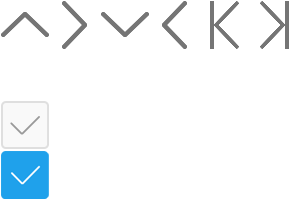
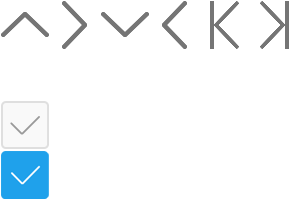
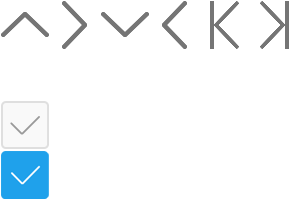
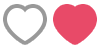
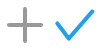

In [3]:
soup

In [4]:
soup.select('dt.title')[0].text

'들어본 이야기'

In [5]:
soup.select('span.score')[0].text

'5'

In [6]:
pd.DataFrame?

In [7]:
a = {'Name': [soup.select('dt.title')[0].text],
        'Stars': [soup.select('span.score')[0].text]}

In [8]:
frame = pd.DataFrame(data=a)
frame

,Name,Stars
0,들어본 이야기,5


# 제목 가져오기(소설/문학)

- 실패했다. 스크롤 실패....
- inifinite scrolling이 제대로 안됨.
- 수웅님 코드에 대한 이해부족으로 실패 -> 다른 사람의 코드를 베껴오자!

In [9]:
driver = webdriver.Chrome('C:/Users/USER/Desktop/데잇걸즈/파이썬/[어수웅] 파이썬 프로그래밍/chromedriver')
driver.implicitly_wait(10)
driver.get("http://m.podbbang.com/audiobooks?category_id=100")
#     driver.find_element_by_xpath('//*[@id="loginPop"]/div/button[1]').click() # 비회원로그인 클릭
#     driver.find_element_by_xpath("//option[@value='1']").click() # 2020년 1분기 기준 (2분기인 경우 숫자 2로 바꾸면 됨)
#     driver.find_element_by_xpath("//option[@value='CS100000']").click() # 업종 대분류 - 외식업 선택
#     driver.implicitly_wait(3)                                      # 드라이버 대기시간
#     driver.find_element_by_xpath(f"//option[@value='CS1000{num}']").click() # 업종 중분류 선택 
#     driver.find_element_by_xpath("//option[@value='store']").click() # 정보 분류 - 점포수 선택
#     driver.find_element_by_xpath('//*[@id="presentSearch"]').click() # 검색 클릭
#     time.sleep(10)                                               # 시간 래그 (이후 반복적 scraping과정에서 오류 줄이기 위함)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

scroll_area = driver.find_element_by_xpath('//*[@id="audiobookIndex"]/div[2]/div/ul')
# 해당 영역까지 일단 전체 화면을 스크롤
action = webdriver.ActionChains(driver)
action.move_to_element(scroll_area).perform()

# 해당 영역 내부를 제일 하단까지 스크롤
driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scroll_area)

# 화면에 값들이 변경되었으므로 다시 BeautifulSoup를 이용해 파싱
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 우리가 필요한 정보 부분을 선택 (.은 class, #은 id)  ('tr.sgXwHf.wdLSAe')
title_list = soup.select('li.audiobook-list-item-component>h3.title')

# 불러온 리스트의 개수 다시 확인
print("title_list length: ", len(title_list))
print("-"*100)

# 전체 리스트 출력
print(title_list)

title_list length:  14
----------------------------------------------------------------------------------------------------
[<h3 class="title">다정한 유전</h3>, <h3 class="title">저스트 어 모멘트</h3>, <h3 class="title">사춘기라서 그래</h3>, <h3 class="title">[단편] 헤엄치는 밤</h3>, <h3 class="title">[단편] 펄럭이는 종이 스기마쓰 성서</h3>, <h3 class="title">[단편] 돼지 먹이</h3>, <h3 class="title">[단편] 어머니는 잠 못 이루고</h3>, <h3 class="title">[단편] 소여</h3>, <h3 class="title">들어본 이야기</h3>, <h3 class="title">엄마는 행복하지 않다고 했다</h3>, <h3 class="title">니가 뭔데 아니 내가 뭔데</h3>, <h3 class="title">아무도 모르는 기적</h3>, <h3 class="title">너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다</h3>, <h3 class="title">청구회 추억 Memories of Chung-Gu Hoe</h3>]


<html lang="ko"><head>
<meta charset="utf-8"/>
<title>국내 최대 팟캐스트, 오디오북, 강연, 오디오 콘텐츠 : 오디오천국 팟빵</title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="telephone=no;" name="format-detection"/>
<link href="http://img.podbbang.com/podbbang_web/css/nanumbarungothic.css" rel="stylesheet"/>
<link href="http://img.podbbang.com/podbbang_web/css/reset.css?v=202007281829" rel="stylesheet"/>
<link href="http://img.podbbang.com/podbbang_web/css/ic-common.css?v=202007281829" rel="stylesheet"/>
<style>
        button {
            background-color: transparent;
        }
        .common-components > .top-button {
            position: fixed;
            right: 15px;
            bottom: 20px;
            width: 50px;
            height: 50px;
            cursor: pointer;
            background-image
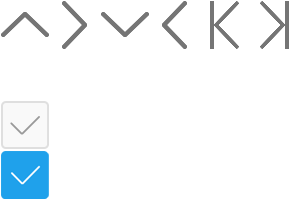
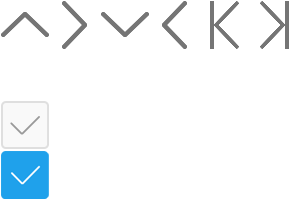
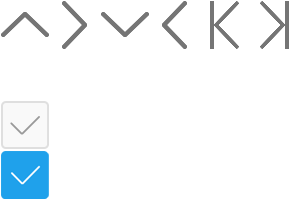
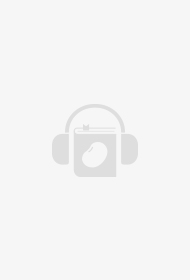
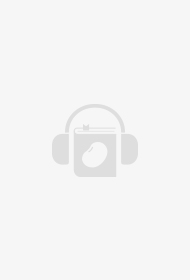

In [10]:
soup

In [12]:
soup.select('li.audiobook-list-item-component>h3.title')

[<h3 class="title">다정한 유전</h3>,
 <h3 class="title">저스트 어 모멘트</h3>,
 <h3 class="title">사춘기라서 그래</h3>,
 <h3 class="title">[단편] 헤엄치는 밤</h3>,
 <h3 class="title">[단편] 펄럭이는 종이 스기마쓰 성서</h3>,
 <h3 class="title">[단편] 돼지 먹이</h3>,
 <h3 class="title">[단편] 어머니는 잠 못 이루고</h3>,
 <h3 class="title">[단편] 소여</h3>,
 <h3 class="title">들어본 이야기</h3>,
 <h3 class="title">엄마는 행복하지 않다고 했다</h3>,
 <h3 class="title">니가 뭔데 아니 내가 뭔데</h3>,
 <h3 class="title">아무도 모르는 기적</h3>,
 <h3 class="title">너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다</h3>,
 <h3 class="title">청구회 추억 Memories of Chung-Gu Hoe</h3>]

In [16]:
title = []
price = []

for i in range(0, len(soup.select('li.audiobook-list-item-component>h3.title'))):
    a = soup.select('li.audiobook-list-item-component>h3.title')[i].text
    b = soup.select('b')[i].text
    title.append(a)
    price.append(b)
    df = pd.DataFrame({
    "title":title,
    "price":price
})
    print(df)

    title   price
0  다정한 유전  5,000원
       title   price
0     다정한 유전  5,000원
1  저스트 어 모멘트  9,900원
       title   price
0     다정한 유전  5,000원
1  저스트 어 모멘트  9,900원
2   사춘기라서 그래  9,900원
         title   price
0       다정한 유전  5,000원
1    저스트 어 모멘트  9,900원
2     사춘기라서 그래  9,900원
3  [단편] 헤엄치는 밤  2,700원
                  title   price
0                다정한 유전  5,000원
1             저스트 어 모멘트  9,900원
2              사춘기라서 그래  9,900원
3           [단편] 헤엄치는 밤  2,700원
4  [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
                  title   price
0                다정한 유전  5,000원
1             저스트 어 모멘트  9,900원
2              사춘기라서 그래  9,900원
3           [단편] 헤엄치는 밤  2,700원
4  [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
5            [단편] 돼지 먹이  2,700원
                  title   price
0                다정한 유전  5,000원
1             저스트 어 모멘트  9,900원
2              사춘기라서 그래  9,900원
3           [단편] 헤엄치는 밤  2,700원
4  [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
5            [단편] 돼지 먹이  2,700원
6     [단편] 어머니는 잠 못 이루고  2,700원
                  title   pric

## 스크롤 다시 도전
참고 https://dev.to/mr_h/python-selenium-infinite-scrolling-3o12

In [17]:
def scroll(driver, timeout):
    scroll_pause_time = timeout

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(scroll_pause_time)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # If heights are the same it will exit the function
            break
        last_height = new_height

In [18]:
driver = webdriver.Chrome('C:/Users/USER/Desktop/데잇걸즈/파이썬/[어수웅] 파이썬 프로그래밍/chromedriver')
driver.implicitly_wait(30)
driver.get("http://m.podbbang.com/audiobooks?category_id=100")
scroll(driver, 5)
#     driver.find_element_by_xpath('//*[@id="loginPop"]/div/button[1]').click() # 비회원로그인 클릭
#     driver.find_element_by_xpath("//option[@value='1']").click() # 2020년 1분기 기준 (2분기인 경우 숫자 2로 바꾸면 됨)
#     driver.find_element_by_xpath("//option[@value='CS100000']").click() # 업종 대분류 - 외식업 선택
#     driver.implicitly_wait(3)                                      # 드라이버 대기시간
#     driver.find_element_by_xpath(f"//option[@value='CS1000{num}']").click() # 업종 중분류 선택 
#     driver.find_element_by_xpath("//option[@value='store']").click() # 정보 분류 - 점포수 선택
#     driver.find_element_by_xpath('//*[@id="presentSearch"]').click() # 검색 클릭
#     time.sleep(10)                                               # 시간 래그 (이후 반복적 scraping과정에서 오류 줄이기 위함)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html lang="ko"><head>
<meta charset="utf-8"/>
<title>국내 최대 팟캐스트, 오디오북, 강연, 오디오 콘텐츠 : 오디오천국 팟빵</title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="telephone=no;" name="format-detection"/>
<link href="http://img.podbbang.com/podbbang_web/css/nanumbarungothic.css" rel="stylesheet"/>
<link href="http://img.podbbang.com/podbbang_web/css/reset.css?v=202007281829" rel="stylesheet"/>
<link href="http://img.podbbang.com/podbbang_web/css/ic-common.css?v=202007281829" rel="stylesheet"/>
<style>
        button {
            background-color: transparent;
        }
        .common-components > .top-button {
            position: fixed;
            right: 15px;
            bottom: 20px;
            width: 50px;
            height: 50px;
            cursor: pointer;
            background-image
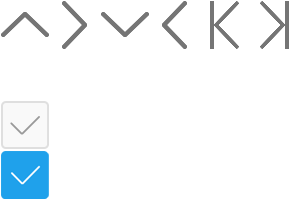
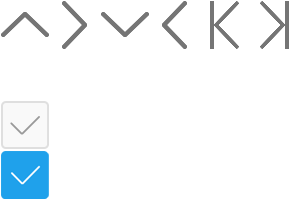
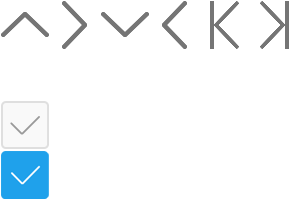
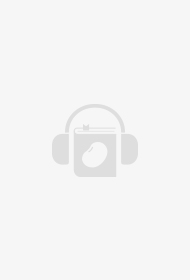
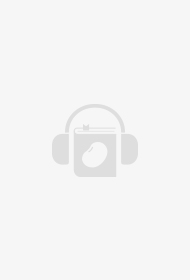

In [19]:
soup

해결해야할 문제의 시작.
-  soup에 불러오는것까지는 성공한 (것) 같음
- 무슨문제냐,제목의 개수와 가격의 개수가 다름
- 찾아보니까, 이 재앙의 시작이 419번 두근두근내인생 책에서부터 엇갈리기 시작.
- 다들 헲...
- 지금 당장 우리에게 가격정보가 필요한 건 아니지만, 향후 우리가 리뷰 크롤링을 할 때 이런 식으로 1:1 매칭이 이루어지지 않고, 이유를 파악하지 못하면 문제가 생길 수도 있다고 생각해서 이 현상의 이유를 파악하고자 함

In [20]:
len(soup.select('ul.audiobook-list-component__list>li.audiobook-list-item-component>h3.title'))
# 책 제목 개수

475

In [21]:
soup.select('li.audiobook-list-item-component>h3.title')
# 책 제목 리스트

[<h3 class="title">다정한 유전</h3>,
 <h3 class="title">저스트 어 모멘트</h3>,
 <h3 class="title">사춘기라서 그래</h3>,
 <h3 class="title">[단편] 헤엄치는 밤</h3>,
 <h3 class="title">[단편] 펄럭이는 종이 스기마쓰 성서</h3>,
 <h3 class="title">[단편] 돼지 먹이</h3>,
 <h3 class="title">[단편] 어머니는 잠 못 이루고</h3>,
 <h3 class="title">[단편] 소여</h3>,
 <h3 class="title">들어본 이야기</h3>,
 <h3 class="title">엄마는 행복하지 않다고 했다</h3>,
 <h3 class="title">니가 뭔데 아니 내가 뭔데</h3>,
 <h3 class="title">아무도 모르는 기적</h3>,
 <h3 class="title">너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다</h3>,
 <h3 class="title">청구회 추억 Memories of Chung-Gu Hoe</h3>,
 <h3 class="title">볼리비아 우표 - 오키나와 데이트</h3>,
 <h3 class="title">볼리비아 우표 - 편서풍</h3>,
 <h3 class="title">볼리비아 우표 - 어둠에 묻힌 밤</h3>,
 <h3 class="title">볼리비아 우표 - 스위치</h3>,
 <h3 class="title">볼리비아 우표 - 볼리비아 우표</h3>,
 <h3 class="title">볼리비아 우표 - ch 41</h3>,
 <h3 class="title">볼리비아 우표 - 명상의 시간</h3>,
 <h3 class="title">볼리비아 우표 - 쥐</h3>,
 <h3 class="title">볼리비아 우표</h3>,
 <h3 class="title">우리들, 킴 - 환대</h3>,
 <h3 class="title">우리들, 킴 - 불안은 영혼을,</

In [22]:
len(soup.select('span.price>b'))
# 책 가격 개수 (책 제목이 475개인데 2개가 모자람)

473

In [23]:
title = []
price = []

for i in range(0, len(soup.select('span.price>b'))):
    a = soup.select('li.audiobook-list-item-component>h3.title')[i].text
    b = soup.select('span.price>b')[i].text
    title.append(a)
    price.append(b)
    df = pd.DataFrame({
    "title":title,
    "price":price
})
    print(df)

    title   price
0  다정한 유전  5,000원
       title   price
0     다정한 유전  5,000원
1  저스트 어 모멘트  9,900원
       title   price
0     다정한 유전  5,000원
1  저스트 어 모멘트  9,900원
2   사춘기라서 그래  9,900원
         title   price
0       다정한 유전  5,000원
1    저스트 어 모멘트  9,900원
2     사춘기라서 그래  9,900원
3  [단편] 헤엄치는 밤  2,700원
                  title   price
0                다정한 유전  5,000원
1             저스트 어 모멘트  9,900원
2              사춘기라서 그래  9,900원
3           [단편] 헤엄치는 밤  2,700원
4  [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
                  title   price
0                다정한 유전  5,000원
1             저스트 어 모멘트  9,900원
2              사춘기라서 그래  9,900원
3           [단편] 헤엄치는 밤  2,700원
4  [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
5            [단편] 돼지 먹이  2,700원
                  title   price
0                다정한 유전  5,000원
1             저스트 어 모멘트  9,900원
2              사춘기라서 그래  9,900원
3           [단편] 헤엄치는 밤  2,700원
4  [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
5            [단편] 돼지 먹이  2,700원
6     [단편] 어머니는 잠 못 이루고  2,700원
                  title   pric

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                                 title    price
0                               다정한 유전   5,000원
1                            저스트 어 모멘트   9,900원
2                             사춘기라서 그래   9,900원
3                          [단편] 헤엄치는 밤   2,700원
4                 [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
5                           [단편] 돼지 먹이   2,700원
6                    [단편] 어머니는 잠 못 이루고   2,700원
7                              [단편] 소여   2,700원
8                              들어본 이야기  10,800원
9                      엄마는 행복하지 않다고 했다  10,800원
10                      니가 뭔데 아니 내가 뭔데  11,700원
11                          아무도 모르는 기적  10,000원
12  너의 거기는 작고 나의 여기는 커서 우리들은 헤어지는 중입니다   9,000원
13     청구회 추억 Memories of Chung-Gu Hoe   5,500원
14                  볼리비아 우표 - 오키나와 데이트   2,000원
15                       볼리비아 우표 - 편서풍   2,000원
16                  볼리비아 우표 - 어둠에 묻힌 밤   2,000원
17                       볼리비아 우표 - 스위치   2,000원
18                   볼리비아 우표 - 볼리비아 우표   2,000원
19                     볼리비아 우표 - ch 41  

                   title   price
0                 다정한 유전  5,000원
1              저스트 어 모멘트  9,900원
2               사춘기라서 그래  9,900원
3            [단편] 헤엄치는 밤  2,700원
4   [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                   ...     ...
60              생각하는 사람들  7,000원
61           주문을 틀리는 요리점  5,000원
62              좀머 씨 이야기  7,500원
63            나만 몰랐던 이야기  9,000원
64                걸리버여행기  6,500원

[65 rows x 2 columns]
                         title   price
0                       다정한 유전  5,000원
1                    저스트 어 모멘트  9,900원
2                     사춘기라서 그래  9,900원
3                  [단편] 헤엄치는 밤  2,700원
4         [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                         ...     ...
61                 주문을 틀리는 요리점  5,000원
62                    좀머 씨 이야기  7,500원
63                  나만 몰랐던 이야기  9,000원
64                      걸리버여행기  6,500원
65  [서영화 낭독] 심장에 수놓은 이야기 _ 작은책  5,500원

[66 rows x 2 columns]
                         title    price
0                       다정한 유전   5,000원
1         

                       title   price
0                     다정한 유전  5,000원
1                  저스트 어 모멘트  9,900원
2                   사춘기라서 그래  9,900원
3                [단편] 헤엄치는 밤  2,700원
4       [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                       ...     ...
77                 일의 기쁨과 슬픔  2,000원
78                  대도시의 사랑법  3,000원
79          [지우 낭독] 요정들 (단편)  6,000원
80    [지우 낭독] 장화 신은 고양이 (단편)  6,000원
81  [에이스 낭독] 잠자는 숲속의 공주 (단편)  6,000원

[82 rows x 2 columns]
                       title   price
0                     다정한 유전  5,000원
1                  저스트 어 모멘트  9,900원
2                   사춘기라서 그래  9,900원
3                [단편] 헤엄치는 밤  2,700원
4       [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                       ...     ...
78                  대도시의 사랑법  3,000원
79          [지우 낭독] 요정들 (단편)  6,000원
80    [지우 낭독] 장화 신은 고양이 (단편)  6,000원
81  [에이스 낭독] 잠자는 숲속의 공주 (단편)  6,000원
82        [에이노 낭독] 상드리용 (단편)  6,000원

[83 rows x 2 columns]
                       title   price
0                     다정한 유전 

                      title    price
0                    다정한 유전   5,000원
1                 저스트 어 모멘트   9,900원
2                  사춘기라서 그래   9,900원
3               [단편] 헤엄치는 밤   2,700원
4      [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                      ...      ...
95                  가나에 아줌마  10,800원
96                    소설 제주   5,400원
97                      페인트   8,000원
98        [윤도현 낭독] 바틀비 (단편)   8,000원
99  [Young K 낭독] 페이퍼 컷 (단편)   5,400원

[100 rows x 2 columns]
                            title   price
0                          다정한 유전  5,000원
1                       저스트 어 모멘트  9,900원
2                        사춘기라서 그래  9,900원
3                     [단편] 헤엄치는 밤  2,700원
4            [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                            ...     ...
96                          소설 제주  5,400원
97                            페인트  8,000원
98              [윤도현 낭독] 바틀비 (단편)  8,000원
99        [Young K 낭독] 페이퍼 컷 (단편)  5,400원
100  [조문근 낭독] 누구나 가슴에 문장이 있다 (단편)  6,900원

[101 rows x 2 columns]
    

                       title   price
0                     다정한 유전  5,000원
1                  저스트 어 모멘트  9,900원
2                   사춘기라서 그래  9,900원
3                [단편] 헤엄치는 밤  2,700원
4       [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                       ...     ...
111            내가 누구를 두려워하리요  8,000원
112    [소수빈 낭독] 연금술사의 돌 (단편)  7,650원
113  [정세운 낭독] 너만 모르는 엔딩 (단편)  5,400원
114                  나의 첫 소년  5,400원
115         [박세진 낭독] 이사 (단편)  5,400원

[116 rows x 2 columns]
                       title   price
0                     다정한 유전  5,000원
1                  저스트 어 모멘트  9,900원
2                   사춘기라서 그래  9,900원
3                [단편] 헤엄치는 밤  2,700원
4       [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                       ...     ...
112    [소수빈 낭독] 연금술사의 돌 (단편)  7,650원
113  [정세운 낭독] 너만 모르는 엔딩 (단편)  5,400원
114                  나의 첫 소년  5,400원
115         [박세진 낭독] 이사 (단편)  5,400원
116         [김윤주 낭독] 재회 (단편)  3,250원

[117 rows x 2 columns]
                       title    price
0                     다정한 

                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
130     셰익스피어 4대 비극 - 맥베스   9,800원
131     셰익스피어 4대 비극 - 리어왕   9,800원
132     셰익스피어 4대 비극 - 오셀로  12,600원
133      셰익스피어 4대 비극 - 햄릿   3,600원
134           적게 자도 괜찮습니다   3,600원

[135 rows x 2 columns]
                           title    price
0                         다정한 유전   5,000원
1                      저스트 어 모멘트   9,900원
2                       사춘기라서 그래   9,900원
3                    [단편] 헤엄치는 밤   2,700원
4           [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                           ...      ...
131            셰익스피어 4대 비극 - 리어왕   9,800원
132            셰익스피어 4대 비극 - 오셀로  12,600원
133             셰익스피어 4대 비극 - 햄릿   3,600원
134                  적게 자도 괜찮습니다   3,600원
135  [혜이니 낭독] 창가 앞에서 두번째 자리 (단편)   1,450원

[136 rows x 2 columns]
                           t

                         title   price
0                       다정한 유전  5,000원
1                    저스트 어 모멘트  9,900원
2                     사춘기라서 그래  9,900원
3                  [단편] 헤엄치는 밤  2,700원
4         [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                         ...     ...
148       [이상 낭독] 잘자요 너구리 (단편)  7,200원
149            [웅재 낭독] 고백 (단편)  5,400원
150      [노태현 낭독] 옥수수 뺑소니 (단편)  5,400원
151       [준 낭독] 좀도둑과 목격자 (단편)  5,400원
152  [와우 낭독] 지금 아니면 못 할 일 (단편)  5,400원

[153 rows x 2 columns]
                         title   price
0                       다정한 유전  5,000원
1                    저스트 어 모멘트  9,900원
2                     사춘기라서 그래  9,900원
3                  [단편] 헤엄치는 밤  2,700원
4         [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                         ...     ...
149            [웅재 낭독] 고백 (단편)  5,400원
150      [노태현 낭독] 옥수수 뺑소니 (단편)  5,400원
151       [준 낭독] 좀도둑과 목격자 (단편)  5,400원
152  [와우 낭독] 지금 아니면 못 할 일 (단편)  5,400원
153    [김병관 낭독] 못 먹어도 go! (단편)  5,400원

[154 rows x 2 columns]
                

                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
166      최유라가 들려주는 한국대표수필  4,500원
167      이문세가 들려주는 한국대표수필  4,500원
168      윤성혜가 들려주는 한국대표수필  8,000원
169      김기덕이 들려주는 한국대표수필  7,500원
170           우리나라 삼국지 5권  8,000원

[171 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
167      이문세가 들려주는 한국대표수필  4,500원
168      윤성혜가 들려주는 한국대표수필  8,000원
169      김기덕이 들려주는 한국대표수필  7,500원
170           우리나라 삼국지 5권  8,000원
171           우리나라 삼국지 4권  8,000원

[172 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
183              아라비안 나이트  24,300원
184                노인과 바다  17,100원
185              봄비 내리는 날  18,900원
186                    바늘  15,300원
187           세상에 없는 나의 집  15,300원

[188 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
184                노인과 바다  17,100원
185              봄비 내리는 날  18,900원
186                    바늘  15,300원
187           세상에 없는 나의 집  15,300원
188             더블 side B  17,100원

[189 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2      

                        title    price
0                      다정한 유전   5,000원
1                   저스트 어 모멘트   9,900원
2                    사춘기라서 그래   9,900원
3                 [단편] 헤엄치는 밤   2,700원
4        [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                        ...      ...
199  [윤덕원 낭독] 해피 아포칼립스! _ 작은책  11,700원
200         [청하 낭독] 환한 밤 (단편)  13,500원
201                        레몬   4,950원
202                    다정한 구원  13,500원
203      [공포괴담집] 무조건 모르는 척하세요  11,700원

[204 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
200     [청하 낭독] 환한 밤 (단편)  13,500원
201                    레몬   4,950원
202                다정한 구원  13,500원
203  [공포괴담집] 무조건 모르는 척하세요  11,700원
204                   후아유  15,300원

[205 rows x 2 columns]
                    title    price
0                  다정한 유전   5

                      title    price
0                    다정한 유전   5,000원
1                 저스트 어 모멘트   9,900원
2                  사춘기라서 그래   9,900원
3               [단편] 헤엄치는 밤   2,700원
4      [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                      ...      ...
218  [이음작가 단편] 바다에 안부를 묻는 일     900원
219        [이음작가 단편] 상냥한 백색     900원
220     [이음작가 단편] 괜찮아, 짖지 마  15,800원
221        [이음작가 단편] 견디는 소음   7,200원
222          당신의 별자리는 무엇인가요   9,000원

[223 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
219      [이음작가 단편] 상냥한 백색     900원
220   [이음작가 단편] 괜찮아, 짖지 마  15,800원
221      [이음작가 단편] 견디는 소음   7,200원
222        당신의 별자리는 무엇인가요   9,000원
223          시시한 사람이면 어때서   9,000원

[224 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스

                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
237              [단편] 초혼굿  2,700원
238              [단편] 첫사랑  2,700원
239         [단편] 천하제일 남가이  2,700원
240             [단편] 천애윤락  2,700원
241                [단편] 책  2,700원

[242 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
238              [단편] 첫사랑  2,700원
239         [단편] 천하제일 남가이  2,700원
240             [단편] 천애윤락  2,700원
241                [단편] 책  2,700원
242                [단편] 창  2,700원

[243 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
256           [단편] 정오의 산책  2,700원
257            [단편] 전원교향곡  2,700원
258           [단편] 장미의 왕자  2,700원
259      [단편] 장글숲을 헤쳐서 가면  2,700원
260       [단편] 이야기를 돌려드리다  2,700원

[261 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
257            [단편] 전원교향곡  2,700원
258           [단편] 장미의 왕자  2,700원
259      [단편] 장글숲을 헤쳐서 가면  2,700원
260       [단편] 이야기를 돌려드리다  2,700원
261               [단편] 이모  2,700원

[262 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
272       [단편] 영희는 언제 우는가  2,700원
273               [단편] 영접  2,700원
274           [단편] 영이(02)  2,700원
275           [단편] 영원한 화자  2,700원
276               [단편] 열쇠  2,700원

[277 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
273               [단편] 영접  2,700원
274           [단편] 영이(02)  2,700원
275           [단편] 영원한 화자  2,700원
276               [단편] 열쇠  2,700원
277               [단편] 역광  2,700원

[278 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                      title   price
0                    다정한 유전  5,000원
1                 저스트 어 모멘트  9,900원
2                  사춘기라서 그래  9,900원
3               [단편] 헤엄치는 밤  2,700원
4      [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                      ...     ...
291                 [단편] 소풍  2,700원
292              [단편] 소드방놀이  2,700원
293  [단편] 소녀들은 자라고 오빠들은 즐겁다  2,700원
294        [단편] 센티멘털도 하루 이틀  2,700원
295                 [단편] 성묘  2,700원

[296 rows x 2 columns]
                      title   price
0                    다정한 유전  5,000원
1                 저스트 어 모멘트  9,900원
2                  사춘기라서 그래  9,900원
3               [단편] 헤엄치는 밤  2,700원
4      [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                      ...     ...
292              [단편] 소드방놀이  2,700원
293  [단편] 소녀들은 자라고 오빠들은 즐겁다  2,700원
294        [단편] 센티멘털도 하루 이틀  2,700원
295                 [단편] 성묘  2,700원
296                  [단편] 섬  2,700원

[297 rows x 2 columns]
                      title   price
0                    다정한 유전  5,000원
1               

                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
310        [단편] 별이 총총한 언덕  2,700원
311            [단편] 별의 동굴  2,700원
312           [단편] 별들의 들판  2,700원
313               [단편] 배웅  2,700원
314              [단편] 밥그릇  2,700원

[315 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
311            [단편] 별의 동굴  2,700원
312           [단편] 별들의 들판  2,700원
313               [단편] 배웅  2,700원
314              [단편] 밥그릇  2,700원
315            [단편] 밤의 마침  2,700원

[316 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                          title   price
0                        다정한 유전  5,000원
1                     저스트 어 모멘트  9,900원
2                      사춘기라서 그래  9,900원
3                   [단편] 헤엄치는 밤  2,700원
4          [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                          ...     ...
329                    [단편] 대용품  2,700원
330                   [단편] 대기자들  2,700원
331               [단편] 당신의 나라에서  2,700원
332                [단편] 달려라, 아비  2,700원
333  [단편] 누가 해변에서 함부로 불꽃놀이를 하는가  2,700원

[334 rows x 2 columns]
                          title   price
0                        다정한 유전  5,000원
1                     저스트 어 모멘트  9,900원
2                      사춘기라서 그래  9,900원
3                   [단편] 헤엄치는 밤  2,700원
4          [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                          ...     ...
330                   [단편] 대기자들  2,700원
331               [단편] 당신의 나라에서  2,700원
332                [단편] 달려라, 아비  2,700원
333  [단편] 누가 해변에서 함부로 불꽃놀이를 하는가  2,700원
334              [단편] 노크하지 않는 집  2,700원

[335 rows x 2 c

                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
347          [단편] 그 밤의 경숙  2,700원
348        [단편] 귓가에 남은 음성  2,700원
349           [단편] 국화를 안고  2,700원
350               [단편] 국수  2,700원
351              [단편] 구덩이  2,700원

[352 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
348        [단편] 귓가에 남은 음성  2,700원
349           [단편] 국화를 안고  2,700원
350               [단편] 국수  2,700원
351              [단편] 구덩이  2,700원
352           [단편] 광기의 역사  2,700원

[353 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                                      title   price
0                                    다정한 유전  5,000원
1                                 저스트 어 모멘트  9,900원
2                                  사춘기라서 그래  9,900원
3                               [단편] 헤엄치는 밤  2,700원
4                      [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                                      ...     ...
364  [단편] Track 2 부산말로는 할 수 없었던 이방인 부르스의 말로  2,700원
365               [단편] Track 1 시티투어버스를 탈취하라  2,700원
366                  [단편] Bonus Track 누구신지…  2,700원
367                            [단편] 79년의 아이  2,700원
368              시인 동주(하늘과 바람과 별과 시, 시 20편)  2,700원

[369 rows x 2 columns]
                          title   price
0                        다정한 유전  5,000원
1                     저스트 어 모멘트  9,900원
2                      사춘기라서 그래  9,900원
3                   [단편] 헤엄치는 밤  2,700원
4          [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                          ...     ...
365   [단편] Track 1 시티투어버스를 탈취하라  2,700원
366      [단편] Bonus Track 누구신지… 

                      title   price
0                    다정한 유전  5,000원
1                 저스트 어 모멘트  9,900원
2                  사춘기라서 그래  9,900원
3               [단편] 헤엄치는 밤  2,700원
4      [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                      ...     ...
382            그리운 나무(시 7편)  2,700원
383  애인은 토막 난 순대처럼 운다(시 6편)  2,700원
384          생활이라는 생각(시 5편)  2,700원
385         내가 살아갈 사람(시 5편)  2,700원
386         심장에 가까운 말(시 5편)  2,700원

[387 rows x 2 columns]
                      title   price
0                    다정한 유전  5,000원
1                 저스트 어 모멘트  9,900원
2                  사춘기라서 그래  9,900원
3               [단편] 헤엄치는 밤  2,700원
4      [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                      ...     ...
383  애인은 토막 난 순대처럼 운다(시 6편)  2,700원
384          생활이라는 생각(시 5편)  2,700원
385         내가 살아갈 사람(시 5편)  2,700원
386         심장에 가까운 말(시 5편)  2,700원
387           무중력 화요일(시 5편)  2,700원

[388 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 

                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
400  키스를 원하지 않는 입술(시 11편)  2,700원
401       아름다운 그런데(시 10편)  2,700원
402   사라진 입을 위한 선언(시 10편)  2,700원
403    나는 희망을 거절한다(시 10편)  2,700원
404     울고 들어온 너에게(시 10편)  2,700원

[405 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
401       아름다운 그런데(시 10편)  2,700원
402   사라진 입을 위한 선언(시 10편)  2,700원
403    나는 희망을 거절한다(시 10편)  2,700원
404     울고 들어온 너에게(시 10편)  2,700원
405    우리들의 마지막 얼굴(시 10편)  2,700원

[406 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원


                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
418                소년이 온다  10,800원
419             두근두근 내 인생  10,800원
420                   강남몽   9,900원
421               엄마를 부탁해   9,900원
422                   완득이  10,800원

[423 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2                사춘기라서 그래   9,900원
3             [단편] 헤엄치는 밤   2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서   2,700원
..                    ...      ...
419             두근두근 내 인생  10,800원
420                   강남몽   9,900원
421               엄마를 부탁해   9,900원
422                   완득이  10,800원
423                별들의 들판  11,700원

[424 rows x 2 columns]
                    title    price
0                  다정한 유전   5,000원
1               저스트 어 모멘트   9,900원
2      

                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
437                    팽이  9,900원
438               밤이 지나간다  3,900원
439               달려라, 아비  3,400원
440  <테이크아웃 오디오북> 우리집 강아지  3,900원
441       <테이크아웃 오디오북> 목견  3,900원

[442 rows x 2 columns]
                    title   price
0                  다정한 유전  5,000원
1               저스트 어 모멘트  9,900원
2                사춘기라서 그래  9,900원
3             [단편] 헤엄치는 밤  2,700원
4    [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                    ...     ...
438               밤이 지나간다  3,900원
439               달려라, 아비  3,400원
440  <테이크아웃 오디오북> 우리집 강아지  3,900원
441       <테이크아웃 오디오북> 목견  3,900원
442  <테이크아웃 오디오북> 부산 이후부터  3,900원

[443 rows x 2 columns]
                       title   price
0                     다정한 유전  5,000원
1                  저스트 어 모멘트  9,900원
2                   사춘기라서

                        title   price
0                      다정한 유전  5,000원
1                   저스트 어 모멘트  9,900원
2                    사춘기라서 그래  9,900원
3                 [단편] 헤엄치는 밤  2,700원
4        [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                        ...     ...
455  [김동식 단편] 어디까지 인간으로 볼 것인가    275원
456           [김동식 단편] 사망 공동체    275원
457            [김동식 단편] 식인 빌딩    275원
458           [김동식 단편] 인간 재활용    275원
459        [김동식 단편] 돈독 오른 예언가    275원

[460 rows x 2 columns]
                                title   price
0                              다정한 유전  5,000원
1                           저스트 어 모멘트  9,900원
2                            사춘기라서 그래  9,900원
3                         [단편] 헤엄치는 밤  2,700원
4                [단편] 펄럭이는 종이 스기마쓰 성서  2,700원
..                                ...     ...
456                   [김동식 단편] 사망 공동체    275원
457                    [김동식 단편] 식인 빌딩    275원
458                   [김동식 단편] 인간 재활용    275원
459                [김동식 단편] 돈독 오른 예언가    275원
460  [김동식 단편] 

419             두근두근 내 인생  10,800원
421               엄마를 부탁해   9,900원

* 휴먼러닝으로 찾아냈습니다...

In [ ]:
df